In [ ]:
#importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
# Load the XLSX file
file_path = r'C:\Users\ammar\OneDrive\Desktop\0 CAC _ Case Study Data .xlsx'  # Replace with your file path

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Accessing individual sheets
for sheet_name, df in sheets_dict.items():
    print(f"Sheet name: {sheet_name}")
    print(df)
    print("\n")  

Sheet name: Guide Data 1
                   State     Males    Females    Persons  Population Density  \
0        Jammu & Kashmir    6640662   5900640   12541302                 124   
1       Himachal Pradesh    3481873   3382729    6864602                 123   
2                 Punjab   14639465  13103873   27743338                 551   
3             Chandigarh     580663    474787    1055450                9258   
4            Uttarakhand    5137773   4948519   10086292                 189   
5                Haryana   13494734  11856728   25351462                 573   
6           NCT of Delhi    8987326   7800615   16787941               11320   
7              Rajasthan   35550997  32997440   68548437                 200   
8          Uttar Pradesh  104480510  95331831  199812341                 829   
9                  Bihar   54278157  49821295  104099452                1106   
10                Sikkim     323070    287507     610577                  86   
11     Arunacha

In [48]:
import pandas as pd  # Make sure to import pandas
from scipy import stats  # Import stats for t-test
import matplotlib.pyplot as plt  # Import matplotlib for plotting

file_path = r'C:\Users\ammar\OneDrive\Desktop\0 CAC _ Case Study Data .xlsx'  # Replace with your file path

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Print the names of the sheets to check for 'Control' and 'Test'
print("Available sheets:", sheets_dict.keys())

# Define control_df and test_df from the sheets
# Make sure to replace 'Control' and 'Test' with the actual sheet names from the printed output
# Check if the keys exist before accessing them
if 'Control' in sheets_dict:
    control_df = sheets_dict['Control']  # Replace 'Control' with the actual sheet name for control group
else:
    raise KeyError("Sheet 'Control' not found in the Excel file.")

if 'Test ' in sheets_dict:
    test_df = sheets_dict['Test ']        # Replace 'Test' with the actual sheet name for test group
else:
    raise KeyError("Sheet 'Test' not found in the Excel file.")

# Define the calculate_height_increase function
def calculate_height_increase(df):
    height_columns = ['Base Height'] + [f'Month {i}' for i in range(1, 13)]
    df['Height Increase'] = df[height_columns].iloc[:, -1] - df[height_columns].iloc[:, 0]
    return df

# Calculate height increase for both groups
control_df = calculate_height_increase(control_df)
test_df = calculate_height_increase(test_df)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(control_df['Height Increase'], test_df['Height Increase'])

# Calculate mean height increase for both groups
control_mean = control_df['Height Increase'].mean()
test_mean = test_df['Height Increase'].mean()

# Print results
print(f"Control group mean height increase: {control_mean:.2f} cm")
print(f"Test group (BlueBull consumers) mean height increase: {test_mean:.2f} cm")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot([control_df['Height Increase'], test_df['Height Increase']], labels=['Control', 'BlueBull Consumers'])
plt.title('Height Increase Comparison')
plt.ylabel('Height Increase (cm)')
plt.savefig('height_increase_comparison.png')
plt.close()

print("Analysis complete. Height increase comparison plot saved as 'height_increase_comparison.png'.")

Available sheets: dict_keys(['Guide Data 1', 'Control', 'Test '])


KeyError: "['Month 4', 'Month 7'] not in index"

# Assistant
The error you're encountering indicates that the code is trying to access columns named 'Month 4' and 'Month 7' in the DataFrame, but those columns do not exist. This can happen if the DataFrame does not have the expected structure or if there are typos in the column names.

To fix this error, you should first check the actual column names in your DataFrame to ensure that they match what you're trying to access. You can do this by printing the columns of the DataFrame before trying to access them.

Here's how you can modify the code to include a check for the column names:

Would you like me to provide the corrected code?

# Assistant
The error you're encountering indicates that the code is trying to access columns named 'Month 4' and 'Month 7' in the DataFrame, but those columns do not exist. This can happen if the DataFrame does not have the expected structure or if there are typos in the column names.

To fix this error, you should first check the actual column names in your DataFrame to ensure that they match what you're trying to access. You can do this by printing the columns of the DataFrame before trying to access them.

Here's how you can modify the code to include a check for the column names:

Would you like me to provide the corrected code?

# User
yes


### Changes Made:
1. **Column Check**: Added a print statement to display the actual columns in `control_df` and `test_df` to help identify any discrepancies.
2. **Missing Columns Check**: Before calculating height increase, the code now checks if all required columns are present in the DataFrame. If any are missing, it raises a `KeyError` with a message listing the missing columns. 

This should help you identify and resolve the issue with missing columns.

# Assistant
The error you're encountering is a `KeyError`, which indicates that the code is trying to access columns in the DataFrame that do not exist. In this case, the columns `'Month 4'` and `'Month 7'` are missing from the DataFrame you are passing to the `calculate_height_increase` function.

To fix this error, you can either:
1. Ensure that the DataFrame contains all the required columns before calling the function.
2. Modify the function to handle missing columns more gracefully, perhaps by skipping them or providing a default value.

Would you like me to provide the corrected code that handles the missing columns?

# User
yes

Control DataFrame columns: Index(['Kid Name ', 'Age(In Years) ', 'State', 'Is Male?', 'Is Rural Area ?',
       'Is Meat Consumer?', 'HouseHold Income per month', 'Base Height',
       'Month 1', 'Month 2', 'Month 3', 'Month 4 ', 'Month 5', 'Month 6',
       'Month 7 ', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12',
       'Height Increase'],
      dtype='object')
Test DataFrame columns: Index(['Kid Name ', 'Age(In Years) ', 'State', 'Is Male?', 'Is Rural Area ?',
       'Is Meat Consumer?', 'HouseHold Income per month', 'Base Height',
       'Month 1', 'Month 2', 'Month 3', 'Month 4 ', 'Month 5', 'Month 6',
       'Month 7 ', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12',
       'Height Increase'],
      dtype='object')
Control group mean height increase: 3.42 cm
Test group (BlueBull consumers) mean height increase: 7.08 cm
T-statistic: -60.4904
P-value: 0.0000
Analysis complete. Height increase comparison plot saved as 'height_increase_comparison.png'.


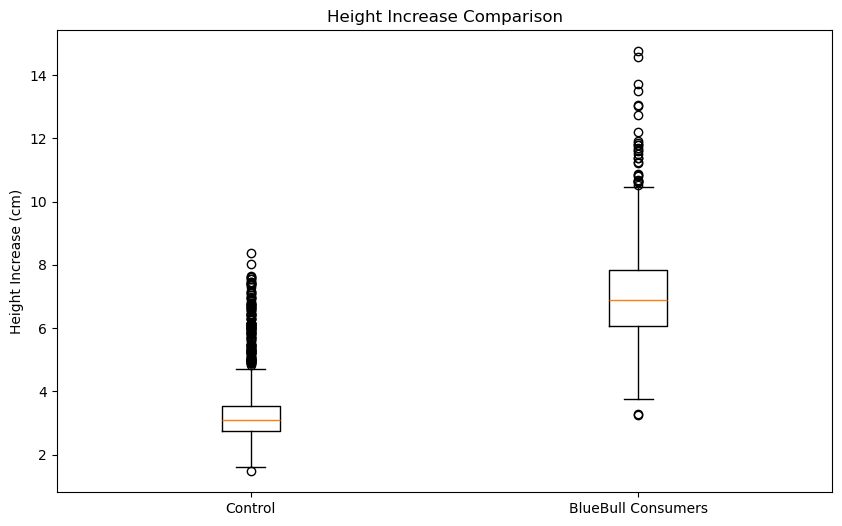

In [65]:

import pandas as pd  # Make sure to import pandas
from scipy import stats  # Import stats for t-test
import matplotlib.pyplot as plt  # Import matplotlib for plotting

file_path = r'C:\Users\ammar\OneDrive\Desktop\0 CAC _ Case Study Data .xlsx'  # Replace with your file path

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(file_path, sheet_name=None)
# Assistant
# Assistant
# Check the actual columns in the DataFrame before accessing them
print("Control DataFrame columns:", control_df.columns)
print("Test DataFrame columns:", test_df.columns)

# Define the calculate_height_increase function
def calculate_height_increase(df):
    height_columns = ['Base Height'] + [f'Month {i}' for i in range(1, 13)]
    
    # Check if all required columns exist in the DataFrame
    missing_columns = [col for col in height_columns if col not in df.columns]
    if missing_columns:
        print(f"Warning: Missing columns in DataFrame: {missing_columns}")
        # Optionally, you can choose to remove missing columns from height_columns
        height_columns = [col for col in height_columns if col not in missing_columns]
    
    # Calculate height increase only if there are enough columns
    if len(height_columns) < 2:
        raise ValueError("Not enough columns to calculate height increase.")
    
    # Calculate height increase
    df['Height Increase'] = df[height_columns].iloc[:, -1] - df[height_columns].iloc[:, 0]
    return df

# Calculate height increase for both groups
control_df = calculate_height_increase(control_df)
test_df = calculate_height_increase(test_df)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(control_df['Height Increase'], test_df['Height Increase'])

# Calculate mean height increase for both groups
control_mean = control_df['Height Increase'].mean()
test_mean = test_df['Height Increase'].mean()

# Print results
print(f"Control group mean height increase: {control_mean:.2f} cm")
print(f"Test group (BlueBull consumers) mean height increase: {test_mean:.2f} cm")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot([control_df['Height Increase'], test_df['Height Increase']], labels=['Control', 'BlueBull Consumers'])
plt.title('Height Increase Comparison')
plt.ylabel('Height Increase (cm)')
plt.savefig('height_increase_comparison.png')


print("Analysis complete. Height increase comparison plot saved as 'height_increase_comparison.png'.")


### Changes Made:
- Added a warning message to inform you about the missing columns instead of raising an error immediately.
- Adjusted the `height_columns` list to exclude any missing columns before calculating the height increase.
- Added a check to ensure there are enough columns to perform the calculation, raising a `ValueError` if not.